In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
df = pd.read_csv(url,names=['A','Current','C','Voltage','E','F','G'])
df

,A,Current,C,Voltage,E,F,G
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [ ]:
print(df.columns)

Index(['A', 'Current', 'C', 'Voltage', 'E', 'F', 'G'], dtype='object')


In [ ]:
df[['Current','Voltage']]

,Current,Voltage
0,234.289,159.0
1,259.426,145.6
2,258.054,161.6
3,284.599,165.0
4,328.975,309.9
5,346.999,359.4
6,365.385,354.7
7,363.112,335.0
8,397.469,304.8
9,419.180,285.7


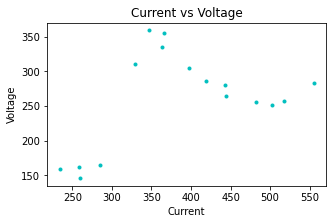

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Current vs Voltage')
plt.xlabel('Current')
plt.ylabel('Voltage')
plt.plot(df['Current'],df['Voltage'],'c.')
plt.show()

[-1000.  -999.  -998. ...   998.   999.  1000.]


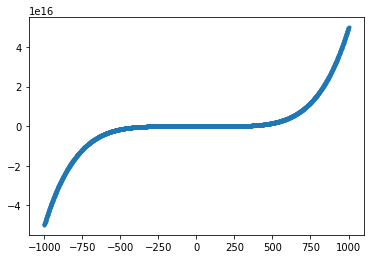

In [ ]:
p=Polynomial([1,2,3,5,30,50])
x=np.linspace(-1000,1000,2001)
print(x)
plt.plot(x,p(x),'.')

In [ ]:
pfit=Polynomial.fit(df['Current'],df['Voltage'],4)
pfit

Polynomial([ 330.58801037,  -47.06931127, -335.22207103,  130.44898039,
        221.62925931], domain=[234.289, 554.894], window=[-1.,  1.])

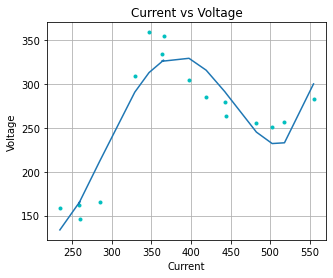

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Current vs Voltage')
plt.xlabel('Current')
plt.ylabel('Voltage')
plt.plot(df['Current'],df['Voltage'],'c.')
plt.plot(df['Current'],pfit(df['Current']))
plt.savefig('mygraph.png')
plt.grid()
plt.show()

In [ ]:
x1=400
y1=pfit(400)
x2=450
y2=pfit(450)

slope=(y2-y1)/(x2-x1)
print(slope)


-0.9160952248533988


In [ ]:
slope=pfit.deriv()(400)
slope

-0.4317469561967591

## **MERCURY FINDING PEAKS**

In [ ]:
url = 'Mercury.csv'
df = pd.read_csv(url,header=None,names=['A','B','C','D','E'])
df

,A,B,C,D,E
0,0.02,0.58,190,2.1,6.3
1,0.04,0.57,190,2.1,6.3
2,0.07,0.56,190,2.1,6.3
3,0.09,0.57,190,2.1,6.3
4,0.12,0.57,190,2.1,6.3
...,...,...,...,...,...
2452,59.90,17.78,191,2.1,6.3
2453,59.92,17.42,191,2.1,6.3
2454,59.95,17.11,191,2.1,6.3
2455,59.97,16.90,191,2.1,6.3


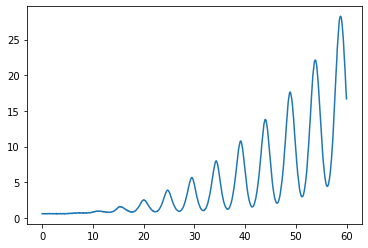

In [ ]:
u1=np.array(df['A'])
ia=np.array(df['B'])
plt.plot(u1,ia)

In [ ]:
from scipy.signal import find_peaks,find_peaks_cwt
from scipy.signal import argrelextrema


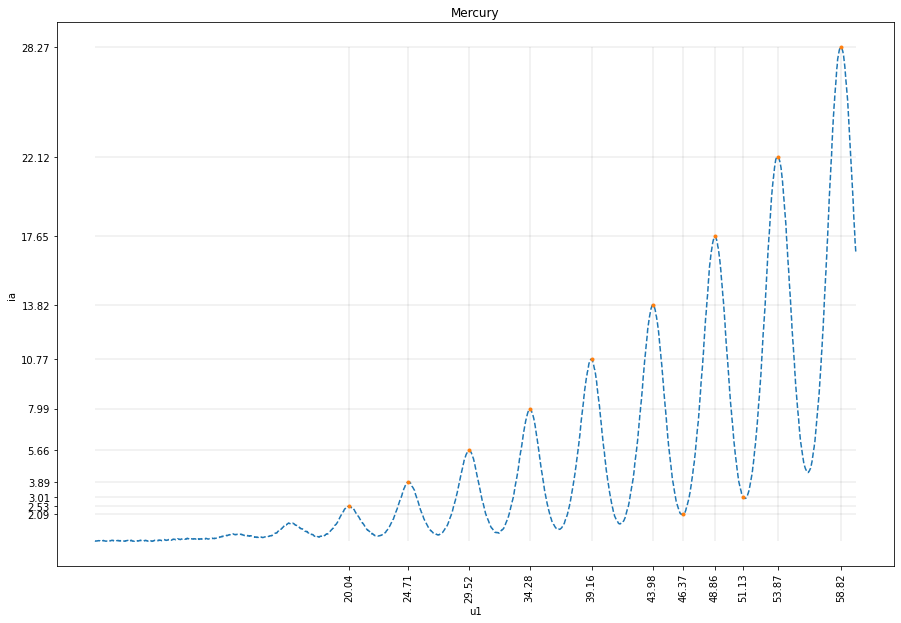

In [ ]:
#adjust distance,height for better result
peak_indices=find_peaks(ia,threshold=None,distance=50,height=2)[0]

plt.figure(figsize=(15,10))
plt.xticks(u1[peak_indices],rotation='vertical')
plt.yticks(ia[peak_indices],rotation='horizontal')
plt.plot(u1,ia,'--')
plt.plot(u1[peak_indices],ia[peak_indices],'.')
plt.vlines(u1[peak_indices],np.min(ia),np.max(ia),'#000000',linewidth=0.1)
plt.hlines(ia[peak_indices],np.min(u1),np.max(u1),'#000000',linewidth=0.1)
plt.title('Mercury')
plt.xlabel('u1')
plt.ylabel('ia')
plt.savefig('Mercury.pdf')
plt.show()

In [ ]:
peak_distance=48.86-43.98
peak_distance

4.880000000000003